### Data Diri
Nama: Yeni Rosandi<br>
Domisili: Kabupaten Tangerang, Banten<br>
Bergabung sejak 30 Nov 2018

#### Kriteria Check (10)
10. Tulis data diri diawal project

## Submission Dicoding

### Studi Kasus
Anda akan membuat program jaringan saraf tiruan menggunakan TensorFlow. Program Anda harus mampu mengenali bentuk tangan yang membentuk gunting, batu, atau kertas.

### Kriteria
Dataset yang dipakai haruslah dataset berikut : rockpaperscissors, atau gunakan link ini pada wget command: https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
<br>Berikut adalah kriteria-kriteria yang harus terpenuhi:
1. Dataset harus dibagi menjadi train set dan validation set.
2. Ukuran validation set harus 40% dari total dataset (data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel).
3. Harus mengimplementasikan augmentasi gambar.
4. Menggunakan image data generator.
5. Model harus menggunakan model sequential.
6. Pelatihan model tidak melebihi waktu 30 menit.
7. Program dikerjakan pada Google Colaboratory.
8. Akurasi dari model minimal 85%.
9. Dapat memprediksi gambar yang diunggah ke Colab.
10. Manambahkan data diri (sesuai profil Dicoding) pada submission/project yang dikirimkan.


#### Kriteria Check (7)
7. Menggunakan google colaboratory,

## Cek Versi Tensorflow
Hal yang pertama dilakukan adalah **mengecek versi TensorFlow** agar dapat membuat image processing yang powerful dibutuhkan **Tensorflow 2.0 keatas**.

In [109]:
import tensorflow as tf
print(tf.__version__)

2.3.0


## Prepare Dataset
Setelah dipastikan versi Tensorflow sudah sesuai. Maka tahap selanjutnya adalah **mempersiapkan data**.

In [110]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-08 11:18:22--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  12.2MB/s    in 13s     

2020-11-08 11:18:35 (23.8 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



**Extraksi pada file zip "rockpaperscissors"** yang telah diunduh diatas.

In [111]:
#Ekstraksi file zip
import zipfile
import os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref. extractall('')
zip_ref.close()

**Mendefinisikan path** agar lebih mudah dipanggil. Pada folder rockpaperscisscors terdapat **3 jenis gambar** yaitu:
1.   Rock
2.   Paper
3.   Scissors



In [112]:
#Menentukan path
rps_dir = 'rockpaperscissors/rps-cv-images'

rock_dir = os.path.join(rps_dir, 'rock')
#Menghitung banyaknya data dengan len
rock_pict = len(os.listdir(rock_dir)) 

paper_dir = os.path.join(rps_dir, 'paper')
paper_pict = len(os.listdir(paper_dir))

scissors_dir = os.path.join(rps_dir, 'scissors')
scissors_pict = len(os.listdir(scissors_dir))

#Menampilkan isi direktori ada apa saja
print('list rps directory:\n', os.listdir(rps_dir))
print('\nRock:', rock_pict, '\nPaper:', paper_pict, '\nScissors:', scissors_pict)

list rps directory:
 ['rock', 'scissors', 'README_rpc-cv-images.txt', 'paper']

Rock: 726 
Paper: 712 
Scissors: 750


### Image Generator
ImageDataGenerator adalah **fungsi untuk mempersiapkan data training dan data testing** yang akan diberikan ke model. Image generator memiliki berbagai macam fungsi, seperti memudahkan dalam **preprocessing data, pelabelan sampel otomatis, dan augmentasi gambar**. ImageDataGenerator menerima data asli, mengubahnya secara acak, dan hanya menampilkan data baru yang diubah. ImageDataGenerator class memastikan bahwa model menerima variasi gambar baru di setiap epoch. 

Pada bagian ini akan dibuat **objek ImageDataGenerator** untuk data training dan data validation. <br>

### Augmentasi Gambar
**Augmentasi gambar adalah** teknik untuk menciptakan data-data baru dari data yang telah ada, serta memperluas ukuran kumpulan data pelatihan secara artifisial dengan memodifikasikan gambar. Digunakan untuk **memperluas data training** dengan tujuan dapat meningkatkan kinerja dan kemampuan model untuk menggeneralisasi.

**Sehingga**:
- Pada data training, data akan dimodifikasi sedemikian rupa. 
- Pada data validasi tidak perlu, dikarenakan validasi akan digunakan untuk mengecek gambar aslinya.

In [113]:
#Kriteria 4: Menggunakan ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [114]:
#Kriteria 3: Implementasi Augmentasi Gambar menggunakan ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale = 1.0/255,
                    rotation_range = 20,
                    horizontal_flip = True,
                    vertical_flip = True,
                    shear_range=0.2,
                    fill_mode='nearest',
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    validation_split = 0.4 #Kriteria 2: Data validasi sebanyak 40%
                    
)

validation_datagen = ImageDataGenerator(
                  rescale = 1.0/255,
                  validation_split = 0.4
)

**Keterangan**<br>
Argumen yang digunakan pada ImageDataGenerator adalah:
- **rescale**, rescaling factor.
- **rotation_range**, degree range for random rotations (Int).
- **zoom_range**, Range for random zoom (float).
- **width_shift_range**, fraction of total width (float). 
- **horizontal_flip**, Randomly flip inputs horizontally (boolean).
- **vertical_flip**, Randomly flip inputs verticaly (boolean).
- **height_shift_range**,raction of total height (float).
- **validation_split**, fraction of images reserved for validation ( float, between 0 and 1).

Sumber: <br>
https://keras.io/api/preprocessing/image/

Kemudian **menggunakan objek image data generator yang telah dibuat sebelumnya untuk mempersiapkan data traning** yang akan dipelajari oleh model, dan juga **data validasi**.

In [115]:
train_generator = train_datagen.flow_from_directory(
                  rps_dir, #direktori dasar
                  target_size = (90, 60), #resolusi diubah
                  batch_size = 55, #Jumlah sampel yang akan disebarkan melalui network
                  class_mode = 'categorical', #Mode untuk kelas yang multi-label output
                  subset = 'training' #data yang diambil data training
)

validation_generator = validation_datagen.flow_from_directory(
                  rps_dir, #direktori dasar
                  target_size = (90, 60), #resolusi diubah
                  batch_size = 55, #Jumlah sampel yang akan disebarkan melalui network
                  class_mode = 'categorical', #Mode untuk kelas yang multi-label output
                  subset = 'validation' #data yang diambil data training
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Setelah diketahui jumlah pembagian data diatas, untuk mempermudah maka data tersebut akan disimpan kedalam variabel **train_img**, dan **val_img**. 


In [116]:
train_img = 1314
val_img = 874
batch = 55 

21

21

#### **Kriteria check! (1-4)**
1. Membagi data menjadi train & Validation.
2. Data validasi sebanyak 40%, sehingga argumen yang digunakan ada validation_split=0.4 untuk membagi gambar menjadi 60% training, 40% validasi.
3. Implementasi Augmentasi Gambar.
4. Menggunakan ImageDataGenerator 

Kemudian kita akan mengecek bentuk datanya setelah di generate dengan kode program berikut ini:

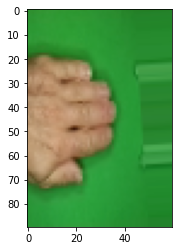

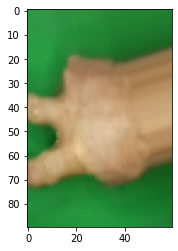

In [117]:
import matplotlib.pyplot as plt

X, Y= train_generator.next()
for i in range (0,2): #batchnya sampe 2 aja soalnya
    image = X[i]
    plt.imshow(image.squeeze())
    plt.show()

Gambar diatas adalah contoh gambar training_generation, yaitu data gambar yang telah di generate/dimodifikasi oleh ImageDataGenerator.

## CNN - The Sequential Model

### Build the model
Setelah data telah siap, maka langkah selanjutnya adalah membangun arsitektur CNN menggunakan **Model Sequential**.

Pada CNN terdapat 2 lapis layer yaitu layer **konvolusi** dan **max pooling**. Pada studi kasus ini kita menggunakan fungsi:
- **Conv2D**, adalah layer konvolusi 2D (konvolusi spasial di atas gambar). Berfungsi untuk mengekstraksi atribut pada gambar.
- **MaxPooling2D**, adalah operasi penggabungan nilai maksimum (Max pooling operation) untuk data spasial 2D dikonversi menjadi satu nilai. Berfungsi untuk mereduksi resolusi gambar sehingga pelatihan lebih cepat.

In [118]:
model_sequence = tf.keras.models.Sequential([
      #Conv2D awal mempelajari total 32 filter. Kemudian Max Pooling digunakan untuk mengurangi dimensi spasial dari output volumevolume.
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(90, 60, 3)),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Flatten(), #Meratakan input
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(3, activation='softmax') #ada 3 output
])

**Catatan**:<br>
**Parameter yang digunakan untuk Conv2D** diatas adalah:
1. **Conv2D**(filters, kernel_size, activation, input_shape)
2. **filter**: Jumlah filter yang akan dipelajari pada layer konvolusi. <br>
   - Conv2D layer **bagian tengah akan belajar lebih banyak filter dibandingkan yg awal**, <br>
   - **Tapi lebih sedikit filter di lapisan yang lebih dekat dengan output**.
3. **kernel_size**: 2 tuple yang menentukan lebar da tinggi konvulsi 2D. <br>
    - Kernel_size harus berisi **nilai int ganjil**.<br>
    - Jika inputan gambar > 128x128, dapat memilih menggunakan ukuran kernel > 3 untuk membantu mempelajari filter spasial yang lebih besar, dan membantu mengurangi ukuran volume.
4.  **activation**: Memungkinkan untuk memberikan string yang menentukan nama fungsi aktivasi yang ingin diterapkan setelah melakukan konvolusi.<br>
    - Aktivasi **relu**: piecewise linear function yang mengeluarkan output positif, selain itu otput=0.<br>
    - Aktivasi **sigmoid** untuk klasifikasi biner (output 1). Loss pada model.compile bernilai **binary_crossentropy**.<br>
    - Aktivasi **softmax** jika memiliki multiple class/output. Loss pada model.compile bernilai **categorical_crossentropy**.
5. **input_shape**: 
   - Pass input_shape bisa tuple/integer.
   - Pada **layer 2D** data yang dimasukan adalah **dimensi gambar** (Studi Kasus).
   - Pada **layer 3D** temporal layers argumennya adalah **input_dim** dan **input_length**

#### Kriteria Check(5)
5. Menggunakan model sequential

Setelah membuat arsitektur dari CNN, tahap selanjutnya adalah **memanggil fungsi compile pada objek model**, serta **menentukan loss function serta optimizer** pada fungsi compile tersebut.

In [119]:
model_sequence.compile(loss="categorical_crossentropy",
                       optimizer=tf.optimizers.Adam(),
                       metrics=['accuracy'])

In [120]:
model_sequence.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 88, 58, 32)        896       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 44, 29, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 42, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 21, 13, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 19, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 9, 5, 128)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 7, 3, 128)        

### **Training Model**
Setelah selesai untuk compile model, selanjutnya adalah **melatih model dengan menggunakan metode fit()**. 

Dengan menggunakan ImageDataGenerator, tidak perlu memasukan parameter gambar dan labelnya, karena **ImageDataGenerator akan secara otomatis melabeli gambar sesuai dengan direktori dimana gambar tersebut tersimpan**.

In [121]:
#Perhitungan steps per epoch adalah train_length // batch_size
train_step = train_img // batch
print("steps_per_epoch : ", train_step)

#Perhitungan validation steps adalah val_length // batch_size
val_step = val_img // batch
print("validation_steps: ", val_step)

steps_per_epoch :  23
validation_steps:  15


In [122]:
#Training model dengan fit
history = model_sequence.fit(
    train_generator,
    steps_per_epoch = train_step, 
    epochs = 20, #Jika belum maksimal epoch dapat ditambahkan
    validation_data = validation_generator, #menampilkan akurasi pengujian data validasi
    validation_steps = val_step,
    verbose=1 #visualisasi training progress
)

history

Epoch 1/20
23/23 [==============================] - 18s 802ms/step - loss: 1.0706 - accuracy: 0.4186 - val_loss: 0.8618 - val_accuracy: 0.7600
Epoch 2/20
23/23 [==============================] - 18s 800ms/step - loss: 0.9229 - accuracy: 0.5695 - val_loss: 0.4310 - val_accuracy: 0.8994
Epoch 3/20
23/23 [==============================] - 18s 795ms/step - loss: 0.6329 - accuracy: 0.7347 - val_loss: 0.2643 - val_accuracy: 0.9370
Epoch 4/20
23/23 [==============================] - 18s 801ms/step - loss: 0.4763 - accuracy: 0.8173 - val_loss: 0.2670 - val_accuracy: 0.9321
Epoch 5/20
23/23 [==============================] - 18s 791ms/step - loss: 0.4426 - accuracy: 0.8427 - val_loss: 0.1546 - val_accuracy: 0.9624
Epoch 6/20
23/23 [==============================] - 18s 795ms/step - loss: 0.2912 - accuracy: 0.9023 - val_loss: 0.1002 - val_accuracy: 0.9770
Epoch 7/20
23/23 [==============================] - 18s 796ms/step - loss: 0.2362 - accuracy: 0.9214 - val_loss: 0.0982 - val_accuracy: 0.9648

#### Kriteria Check(6 & 8)
pada hasil training diatas dapat diketahui:
6. Traning model < 30 menit
8. Akurasi > 85%


Didapatkan:
- **Akurasi** sebesar 0.9722 atau **97%**
- **Waktu training model** selama 411.208s atau **6.8535 menit**
<br><br>

Berikut kita akan membuat plot dari hasil training data diatas agar lebih mudah melihat distribusi akurasi dan loss.

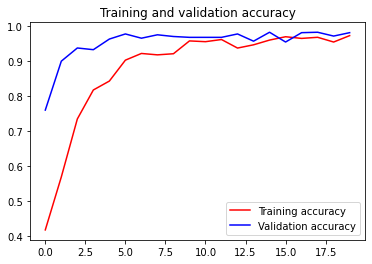

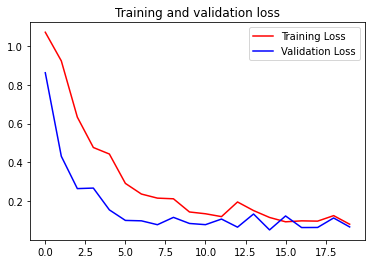

In [137]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Hasil Prediksi Gambar
Setelah training data maka kita akan mencoba memprediksi data inputan.

Contoh hasil yang saya dapatkan:
![picture](https://drive.google.com/uc?export=view&id=1flXm7uwhIslqPccJ3HMraC2tbGmqUjpr)

#### Kriteria Check(9)
Berikut adalah kode programnya:

Saving photo6142943345689864850.jpg to photo6142943345689864850 (1).jpg
photo6142943345689864850.jpg
[[3.174363e-06 9.999968e-01 0.000000e+00]]
Batu


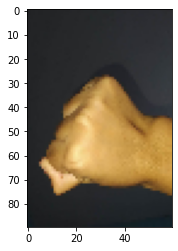

In [131]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

upload = files.upload()

for i in upload.keys():
  path = i
  gambar = image.load_img(path, target_size=(90, 60))
  plot_gambar = plt.imshow(gambar)
  x = image.img_to_array(gambar)
  x = np.expand_dims(x, axis=0)

  gambar2 = np.vstack([x])
  kelas = model_sequence.predict(gambar2, batch_size=15)

  print(i)
  print(kelas) #cek isi kelas

  kelas1 = kelas[0][0]
  kelas2 = kelas[0][1]
  kelas3 = kelas[0][2]
  
  if (kelas1>kelas2) & (kelas1>kelas3):
    print("Kertas")
  elif (kelas2>kelas1) & (kelas2>kelas3):
    print("Batu")
  elif (kelas3>kelas1) & (kelas3>kelas2):
    print('Gunting')
  else:
    print("Tidak terdeteksi")